<a href="https://colab.research.google.com/github/bhatnagaraashish/KYC_AML_Compliance_Data_Analysis/blob/main/AML_KYC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Load Libraries & Data

In [52]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_style("whitegrid")

# Define file paths
kyc_file = 'mock_customers.csv'
transactions_file = 'mock_transactions.csv'

# Load data
kyc_df = pd.read_csv(kyc_file)
transactions_df = pd.read_csv(transactions_file)

# Preview data
print("KYC Data:")
display(kyc_df.head())

print("Transactions Data:")
display(transactions_df.head())

KYC Data:


,customer_id,country,pep_flag,sanctions_flag,kyc_tier,onboarding_date,last_review_date
0,C0001,AE,0,0,Low,2019-11-13,2025-07-01
1,C0002,NL,0,0,High,2020-04-17,2025-07-16
2,C0003,CY,1,0,Low,2020-12-13,2025-08-02
3,C0004,US,0,0,Low,2022-05-15,2025-05-11
4,C0005,BE,0,0,Low,2018-01-05,2024-10-16


Transactions Data:


,tx_id,customer_id,tx_datetime,amount,currency,customer_country,counterparty_country,is_international,channel,tx_type,customer_pep_flag,customer_sanctions_flag,customer_kyc_tier
0,T000001,C0073,2024-09-15 15:22:00,554.53,EUR,DE,US,1,Online,CashWithdrawal,0,0,Low
1,T000002,C0075,2025-03-13 21:02:00,13395.58,EUR,IN,IN,0,Branch,CardPayment,0,0,Low
2,T000003,C0041,2024-09-09 19:14:00,3328.39,EUR,AE,MT,1,Branch,CardPayment,0,0,Low
3,T000004,C0076,2025-03-10 12:43:00,350.91,EUR,MT,NL,1,Online,CardPayment,0,0,Low
4,T000005,C0057,2025-01-25 18:07:00,1805.04,EUR,GB,IE,1,Branch,CashWithdrawal,0,0,Medium


## Step 2: Data Cleaning

In [53]:
# Check for missing values
print("KYC missing values:\n", kyc_df.isnull().sum())
print("Transactions missing values:\n", transactions_df.isnull().sum())

# Check for duplicates
print("KYC duplicates:", kyc_df.duplicated().sum())
print("Transactions duplicates:", transactions_df.duplicated().sum())

# Standardize date columns
kyc_df['onboarding_date'] = pd.to_datetime(kyc_df['onboarding_date'])
kyc_df['last_review_date'] = pd.to_datetime(kyc_df['last_review_date'])
transactions_df['tx_datetime'] = pd.to_datetime(transactions_df['tx_datetime'])

# Check data types
print(kyc_df.dtypes)
print(transactions_df.dtypes)

KYC missing values:
 customer_id         0
country             0
pep_flag            0
sanctions_flag      0
kyc_tier            0
onboarding_date     0
last_review_date    0
dtype: int64
Transactions missing values:
 tx_id                      0
customer_id                0
tx_datetime                0
amount                     0
currency                   0
customer_country           0
counterparty_country       0
is_international           0
channel                    0
tx_type                    0
customer_pep_flag          0
customer_sanctions_flag    0
customer_kyc_tier          0
dtype: int64
KYC duplicates: 0
Transactions duplicates: 0
customer_id                 object
country                     object
pep_flag                     int64
sanctions_flag               int64
kyc_tier                    object
onboarding_date     datetime64[ns]
last_review_date    datetime64[ns]
dtype: object
tx_id                              object
customer_id                        object
tx_d

## Step 3: Merge KYC & Transactions

In [54]:
# Merge on Client_ID
merged_df = pd.merge(transactions_df, kyc_df, on="customer_id", how="left")

# Check merged data
display(merged_df.head())
print("Merged data shape:", merged_df.shape)

,tx_id,customer_id,tx_datetime,amount,currency,customer_country,counterparty_country,is_international,channel,tx_type,customer_pep_flag,customer_sanctions_flag,customer_kyc_tier,country,pep_flag,sanctions_flag,kyc_tier,onboarding_date,last_review_date
0,T000001,C0073,2024-09-15 15:22:00,554.53,EUR,DE,US,1,Online,CashWithdrawal,0,0,Low,DE,0,0,Low,2023-04-16,2025-06-06
1,T000002,C0075,2025-03-13 21:02:00,13395.58,EUR,IN,IN,0,Branch,CardPayment,0,0,Low,IN,0,0,Low,2020-08-14,2025-07-20
2,T000003,C0041,2024-09-09 19:14:00,3328.39,EUR,AE,MT,1,Branch,CardPayment,0,0,Low,AE,0,0,Low,2019-12-05,2025-02-05
3,T000004,C0076,2025-03-10 12:43:00,350.91,EUR,MT,NL,1,Online,CardPayment,0,0,Low,MT,0,0,Low,2022-06-25,2025-06-22
4,T000005,C0057,2025-01-25 18:07:00,1805.04,EUR,GB,IE,1,Branch,CashWithdrawal,0,0,Medium,GB,0,0,Medium,2021-08-05,2025-05-20


Merged data shape: (600, 19)


## Step 4: Basic Analysis

In [55]:
# Number of transactions per client
txn_count = merged_df.groupby("customer_id")["tx_id"].count()
print("Transactions per client:\n", txn_count)

# Total transaction amount per client
total_amount = merged_df.groupby("customer_id")["amount"].sum()
print("Total transaction amount per client:\n", total_amount)

Transactions per client:
 customer_id
C0001     8
C0002    10
C0003     4
C0004     7
C0005     6
         ..
C0076    11
C0077     9
C0078     5
C0079    13
C0080     2
Name: tx_id, Length: 80, dtype: int64
Total transaction amount per client:
 customer_id
C0001     90595.62
C0002     57260.41
C0003      9970.22
C0004     16834.91
C0005     45685.81
           ...    
C0076     31183.51
C0077     15065.44
C0078     13639.84
C0079    165795.50
C0080      3957.67
Name: amount, Length: 80, dtype: float64


## Step 5: Flag High-Risk / PEP Clients

In [56]:
# PEP flagged clients
pep_clients = merged_df[merged_df['pep_flag'] == 1]
print("PEP clients:")
display(pep_clients)

PEP clients:


,tx_id,customer_id,tx_datetime,amount,currency,customer_country,counterparty_country,is_international,channel,tx_type,customer_pep_flag,customer_sanctions_flag,customer_kyc_tier,country,pep_flag,sanctions_flag,kyc_tier,onboarding_date,last_review_date
25,T000026,C0008,2025-03-10 06:21:00,2371.94,EUR,LU,IN,1,Online,WireOut,1,0,Medium,LU,1,0,Medium,2020-02-13,2025-07-10
39,T000040,C0008,2024-11-10 18:05:00,3251.39,EUR,LU,LU,0,Branch,CardPayment,1,0,Medium,LU,1,0,Medium,2020-02-13,2025-07-10
47,T000048,C0013,2024-01-29 07:25:00,2618.93,EUR,BE,NL,1,Online,WireOut,1,0,Medium,BE,1,0,Medium,2019-01-05,2025-05-13
53,T000054,C0040,2025-04-02 05:17:00,377.97,EUR,NG,AE,1,Online,WireOut,1,0,Low,NG,1,0,Low,2021-04-27,2025-03-16
123,T000124,C0027,2024-12-07 14:04:00,304.80,EUR,IE,IN,1,Online,CashWithdrawal,1,0,Medium,IE,1,0,Medium,2023-01-28,2025-03-29
134,T000135,C0040,2024-07-14 23:37:00,1638.11,EUR,NG,AE,1,Online,CashDeposit,1,0,Low,NG,1,0,Low,2021-04-27,2025-03-16
142,T000143,C0058,2024-06-12 06:54:00,526.77,EUR,MT,NG,1,ATM,CashWithdrawal,1,0,Medium,MT,1,0,Medium,2022-10-24,2025-03-26
146,T000147,C0040,2024-11-16 13:08:00,1725.02,EUR,NG,GB,1,Online,CashDeposit,1,0,Low,NG,1,0,Low,2021-04-27,2025-03-16
147,T000148,C0003,2024-11-28 12:39:00,2737.91,EUR,CY,GB,1,ATM,CashWithdrawal,1,0,Low,CY,1,0,Low,2020-12-13,2025-08-02
149,T000150,C0008,2024-10-21 22:31:00,2471.67,EUR,LU,CY,1,Online,CashWithdrawal,1,0,Medium,LU,1,0,Medium,2020-02-13,2025-07-10


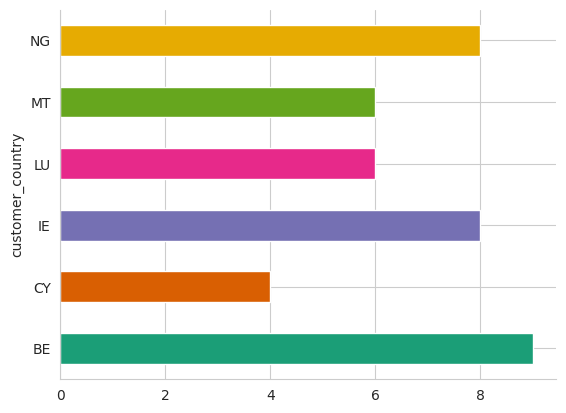

In [57]:
# @title customer_country

from matplotlib import pyplot as plt
import seaborn as sns
pep_clients.groupby('customer_country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Visualisation 1: PEP Clients by customer_country

This graph specifically shows the distribution of clients who have been flagged as PEP (Politically Exposed Person) across different countries.
Each bar represents a country, and the length of the bar indicates the number of PEP flagged clients from that country in your dataset.
Looking at the bar lengths, you can see which countries have the highest and lowest number of PEP clients. For example, based on the plot, BE (Belgium) and NG (Nigeria) appear to have the highest number of PEP clients, while CY (Cyprus) has the lowest among the countries shown.
This visualization helps to highlight the geographical concentration of PEP clients within your customer base.

## Step 6: Visualisations

In [58]:
# Plot Risk Rating Distribution
# plt.figure(figsize=(6,4))
# sns.countplot(data=merged_df, x='Risk_Rating', palette='Set2')
# plt.title("Risk Rating Distribution")
# plt.savefig("../visualizations/risk_rating_distribution.png")
# plt.show()

### Step 6: Task 1 - Define Risk Rating

Define risk rating criteria based on 'pep_flag', 'sanctions_flag', and 'kyc_tier' columns in the `merged_df` DataFrame, create a new 'Risk_Rating' column based on these criteria, and then analyze and visualize the distribution of the 'Risk_Rating'.

### Define Risk Rating Criteria

### Subtask:
Combine the 'pep_flag', 'sanctions_flag', and 'kyc_tier' columns to assign a risk rating (e.g., Low, Medium, High).


**Reasoning**:
Define the logic for assigning risk ratings based on 'pep_flag', 'sanctions_flag', and 'kyc_tier' columns. This will be done by outlining the rules for each risk category (Low, Medium, High).



In [59]:
# Define risk rating criteria
# High Risk:
# - sanctions_flag = 1
# - pep_flag = 1 and kyc_tier = High or Medium
# Medium Risk:
# - pep_flag = 1 and kyc_tier = Low
# - kyc_tier = Medium or High (if not already classified as High)
# Low Risk:
# - pep_flag = 0 and sanctions_flag = 0 and kyc_tier = Low

print("Risk rating criteria defined.")

Risk rating criteria defined.


In [60]:
# Transaction Amount by Risk Rating
# plt.figure(figsize=(6,4))
# sns.barplot(x=risk_amount.index, y=risk_amount.values, palette='Set1')
# plt.title("Total Transaction Amount per Risk Rating")
# plt.ylabel("Amount")
# plt.savefig("../visualizations/transaction_amount_risk.png")
# plt.show()

### Step 6: Task 2 - Create 'Risk Rating' column

Subtask: Implement the logic to create the new 'Risk_Rating' column in the `merged_df` DataFrame based on the defined criteria.


**Reasoning**:
Implement the function to calculate the risk rating based on the defined criteria and apply it to the merged_df to create the 'Risk_Rating' column, then display the head and value counts to verify.



In [61]:
def calculate_risk_rating(row):
    if row['sanctions_flag'] == 1:
        return 'High'
    elif row['pep_flag'] == 1 and (row['kyc_tier'] == 'High' or row['kyc_tier'] == 'Medium'):
        return 'High'
    elif row['pep_flag'] == 1 and row['kyc_tier'] == 'Low':
        return 'Medium'
    elif row['kyc_tier'] == 'Medium' or row['kyc_tier'] == 'High':
        return 'Medium'
    else:
        return 'Low'

merged_df['Risk_Rating'] = merged_df.apply(calculate_risk_rating, axis=1)

display(merged_df.head())
print("Risk Rating Distribution:\n", merged_df['Risk_Rating'].value_counts())

,tx_id,customer_id,tx_datetime,amount,currency,customer_country,counterparty_country,is_international,channel,tx_type,customer_pep_flag,customer_sanctions_flag,customer_kyc_tier,country,pep_flag,sanctions_flag,kyc_tier,onboarding_date,last_review_date,Risk_Rating
0,T000001,C0073,2024-09-15 15:22:00,554.53,EUR,DE,US,1,Online,CashWithdrawal,0,0,Low,DE,0,0,Low,2023-04-16,2025-06-06,Low
1,T000002,C0075,2025-03-13 21:02:00,13395.58,EUR,IN,IN,0,Branch,CardPayment,0,0,Low,IN,0,0,Low,2020-08-14,2025-07-20,Low
2,T000003,C0041,2024-09-09 19:14:00,3328.39,EUR,AE,MT,1,Branch,CardPayment,0,0,Low,AE,0,0,Low,2019-12-05,2025-02-05,Low
3,T000004,C0076,2025-03-10 12:43:00,350.91,EUR,MT,NL,1,Online,CardPayment,0,0,Low,MT,0,0,Low,2022-06-25,2025-06-22,Low
4,T000005,C0057,2025-01-25 18:07:00,1805.04,EUR,GB,IE,1,Branch,CashWithdrawal,0,0,Medium,GB,0,0,Medium,2021-08-05,2025-05-20,Medium


Risk Rating Distribution:
 Risk_Rating
Low       338
Medium    220
High       42
Name: count, dtype: int64


## Step 7: Analyze and visualize risk ratings

Subtask: Analyze the distribution of the newly created 'Risk_Rating' and visualize it to understand the risk profile of the customer base.


**Reasoning**:
Create a count plot of the 'Risk_Rating' column to visualize its distribution, save it to the specified directory, and then display the plot.



## Visualisation 2: Transaction Amount by Risk Rating

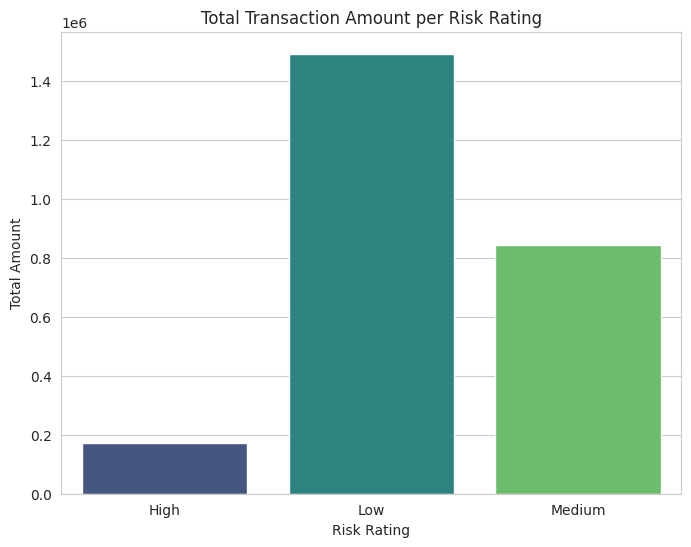

In [62]:
risk_amount = merged_df.groupby('Risk_Rating')['amount'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=risk_amount.index, y=risk_amount.values, palette='viridis', hue=risk_amount.index, legend=False)
plt.title("Total Transaction Amount per Risk Rating")
plt.xlabel("Risk Rating")
plt.ylabel("Total Amount")
plt.savefig("../visualizations/transaction_amount_risk.png")
plt.show()

### Analyze and Visualize Risk Ratings

Subtask:
Analyze the distribution of the newly created 'Risk_Rating' and visualize it to understand the risk profile of the customer base.

**Reasoning**:
Create a count plot of the 'Risk_Rating' column to visualize its distribution, save it to the specified directory, and then display the plot.

## Visualisation 3: Plot Risk Rating Distribution

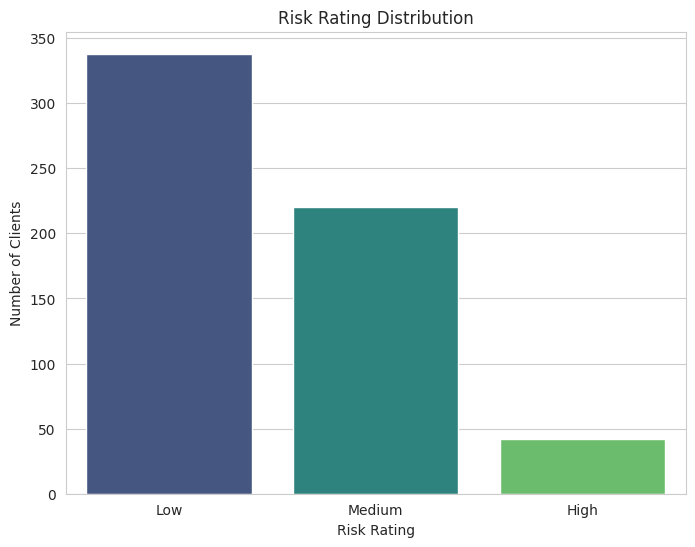

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Risk_Rating', palette='viridis', hue='Risk_Rating', legend=False)
plt.title("Risk Rating Distribution")
plt.xlabel("Risk Rating")
plt.ylabel("Number of Clients")
plt.savefig("../visualizations/risk_rating_distribution.png")
plt.show()

## Step 8: Task - Analyze and Visualize the Distribution of Transaction Types, Channels, and International vs. Domestic Transactions for Each Risk Rating Category.
Analyze and visualize transaction patterns, geographical distribution, and temporal trends related to risk ratings, perform a deep dive into high-risk clients, explore correlations with other attributes, and summarize the findings.

## Visualisation 4 : Analyze Distribution of Transaction Types by Risk Rating

**Reasoning**:
Group the data by risk rating and transaction type to analyze the distribution of transaction types across risk categories, then create a bar plot to visualize this distribution.



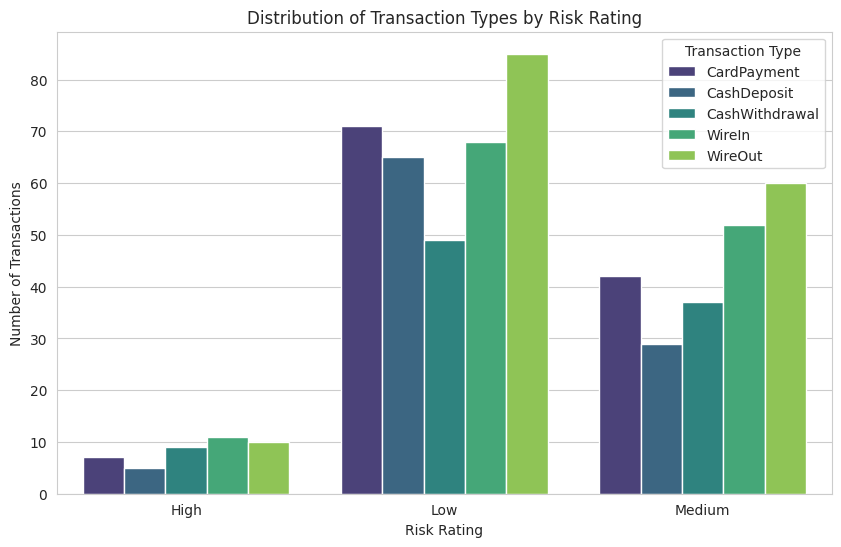

In [64]:
tx_type_risk = merged_df.groupby(['Risk_Rating', 'tx_type']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=tx_type_risk, x='Risk_Rating', y='count', hue='tx_type', palette='viridis')
plt.title("Distribution of Transaction Types by Risk Rating")
plt.xlabel("Risk Rating")
plt.ylabel("Number of Transactions")
plt.legend(title="Transaction Type")
plt.savefig("../visualizations/transaction_type_risk.png")
plt.show()

**Reasoning**:
Group the data by risk rating and channel to analyze the distribution of transaction channels across risk categories, then create a bar plot to visualize this distribution.



## Visualisation 5 : Analyze Distribution of Transaction Channels by Risk Rating

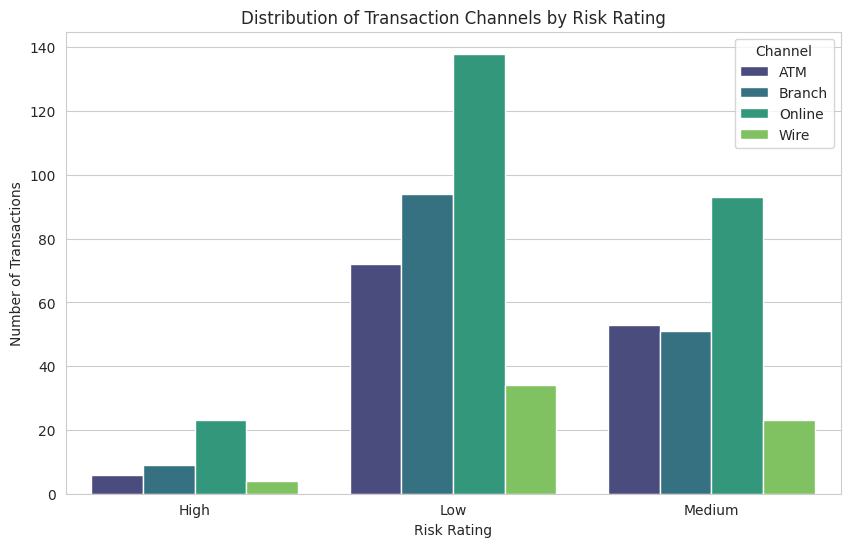

In [65]:
channel_risk = merged_df.groupby(['Risk_Rating', 'channel']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_risk, x='Risk_Rating', y='count', hue='channel', palette='viridis')
plt.title("Distribution of Transaction Channels by Risk Rating")
plt.xlabel("Risk Rating")
plt.ylabel("Number of Transactions")
plt.legend(title="Channel")
plt.savefig("../visualizations/transaction_channel_risk.png")
plt.show()

**Reasoning**:
Group the data by risk rating and international transaction flag to analyze the distribution of international vs. domestic transactions across risk categories, then create a bar plot to visualize this distribution.



## Visualisation 6 : Analyze Distribution of International vs. Domestic Transactions by Risk Rating

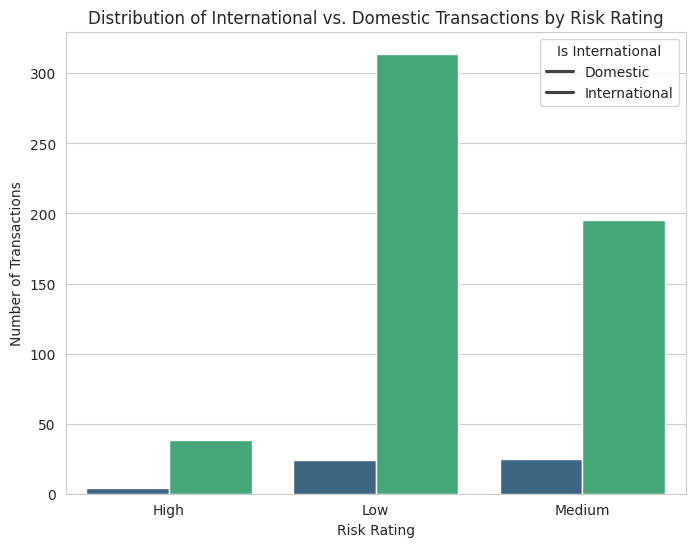

In [66]:
international_risk = merged_df.groupby(['Risk_Rating', 'is_international']).size().reset_index(name='count')
plt.figure(figsize=(8, 6))
sns.barplot(data=international_risk, x='Risk_Rating', y='count', hue='is_international', palette='viridis')
plt.title("Distribution of International vs. Domestic Transactions by Risk Rating")
plt.xlabel("Risk Rating")
plt.ylabel("Number of Transactions")
plt.legend(title="Is International", labels=["Domestic", "International"])
plt.savefig("../visualizations/transaction_international_risk.png")
plt.show()

## Step 9: Perform Geographical Analysis of Risk

Subtask: Analyze and visualize the distribution of risk ratings across different countries.


**Reasoning**:
Group the merged_df by 'country' and 'Risk_Rating', count the occurrences, and store the result in a new DataFrame.



In [67]:
# Group by country and Risk_Rating and count occurrences
country_risk_distribution = merged_df.groupby(['country', 'Risk_Rating']).size().reset_index(name='count')

**Reasoning**:
Create a stacked bar plot to visualize the distribution of risk ratings within each country using the grouped data, add title and labels, save it to the specified directory, and display the plot.



## Visualisation 7: Distribution of Risk Ratings by Country

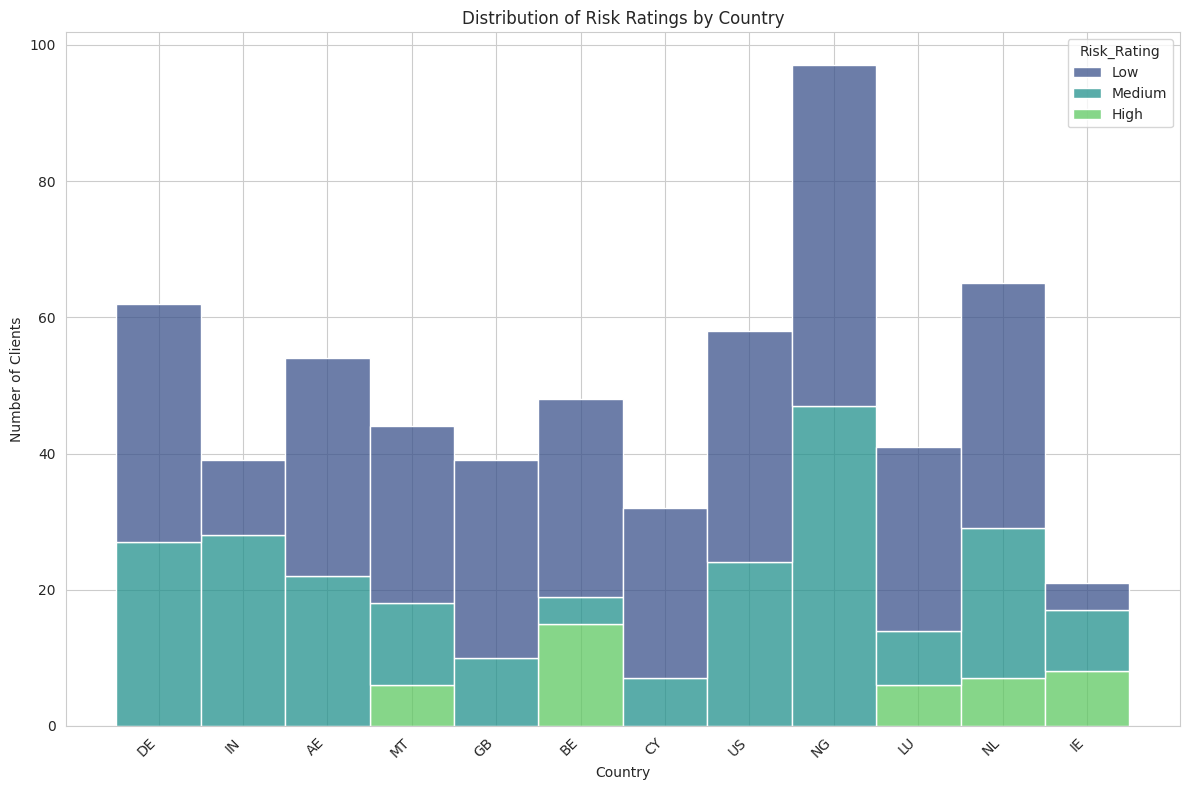

In [68]:
plt.figure(figsize=(12, 8))
sns.histplot(data=merged_df, x='country', hue='Risk_Rating', multiple='stack', palette='viridis')
plt.title("Distribution of Risk Ratings by Country")
plt.xlabel("Country")
plt.ylabel("Number of Clients")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("../visualizations/country_risk_stacked_bar_chart.png")
plt.show()

## Step 10: Analyze Risk Over Time

Subtask:Analyze and visualize how the risk profile changes over time using the transaction timestamps and client onboarding/review dates.

**Reasoning**:
Extract the month and year from the 'tx_datetime', 'onboarding_date', and 'last_review_date' columns to enable temporal analysis of risk.

In [69]:
merged_df['tx_month_year'] = merged_df['tx_datetime'].dt.to_period('M')
merged_df['onboarding_month_year'] = merged_df['onboarding_date'].dt.to_period('M')
merged_df['last_review_month_year'] = merged_df['last_review_date'].dt.to_period('M')

display(merged_df.head())

,tx_id,customer_id,tx_datetime,amount,currency,customer_country,counterparty_country,is_international,channel,tx_type,...,country,pep_flag,sanctions_flag,kyc_tier,onboarding_date,last_review_date,Risk_Rating,tx_month_year,onboarding_month_year,last_review_month_year
0,T000001,C0073,2024-09-15 15:22:00,554.53,EUR,DE,US,1,Online,CashWithdrawal,...,DE,0,0,Low,2023-04-16,2025-06-06,Low,2024-09,2023-04,2025-06
1,T000002,C0075,2025-03-13 21:02:00,13395.58,EUR,IN,IN,0,Branch,CardPayment,...,IN,0,0,Low,2020-08-14,2025-07-20,Low,2025-03,2020-08,2025-07
2,T000003,C0041,2024-09-09 19:14:00,3328.39,EUR,AE,MT,1,Branch,CardPayment,...,AE,0,0,Low,2019-12-05,2025-02-05,Low,2024-09,2019-12,2025-02
3,T000004,C0076,2025-03-10 12:43:00,350.91,EUR,MT,NL,1,Online,CardPayment,...,MT,0,0,Low,2022-06-25,2025-06-22,Low,2025-03,2022-06,2025-06
4,T000005,C0057,2025-01-25 18:07:00,1805.04,EUR,GB,IE,1,Branch,CashWithdrawal,...,GB,0,0,Medium,2021-08-05,2025-05-20,Medium,2025-01,2021-08,2025-05


## Visualisation 8: Distribution of Risk Ratings Over Transaction Time

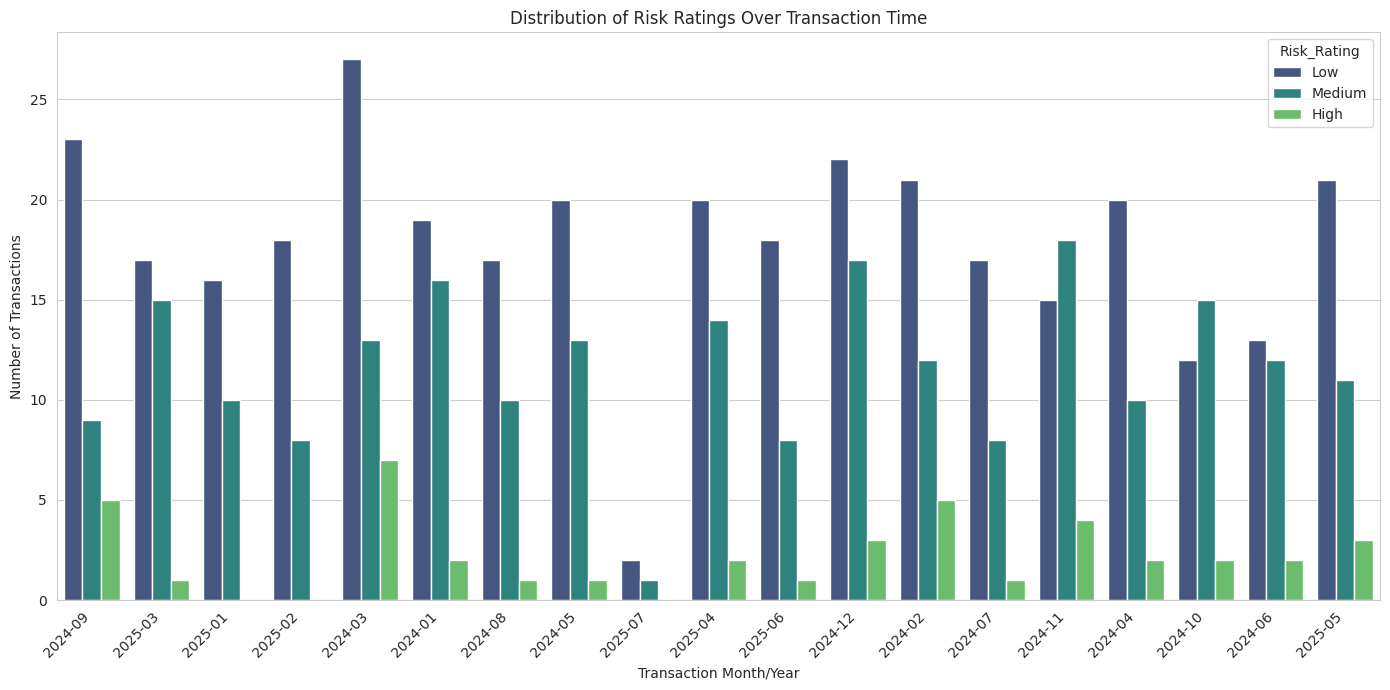

In [70]:
# Group by transaction month/year and Risk_Rating and count occurrences
tx_time_risk = merged_df.groupby(['tx_month_year', 'Risk_Rating']).size().reset_index(name='count')

# Convert 'tx_month_year' to datetime for proper sorting on the plot
tx_time_risk['tx_month_year'] = tx_time_risk['tx_month_year'].dt.to_timestamp()

plt.figure(figsize=(14, 7))
sns.countplot(data=merged_df, x='tx_month_year', hue='Risk_Rating', palette='viridis')
plt.title("Distribution of Risk Ratings Over Transaction Time")
plt.xlabel("Transaction Month/Year")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("../visualizations/transaction_time_risk_stacked_bar_chart.png")
plt.show()

## Summary of the Key Findings:

1. ### Risk Rating Distribution: The majority of clients fall into the 'Low' risk category, followed by 'Medium', and then 'High'.
2. ### Total Transaction Amount per Risk Rating: The 'Low' risk category accounts for the highest total transaction amount, which is expected given the number of clients in this category. The 'Medium' risk category also represents a significant portion of the total transaction amount, while the 'High' risk category has the lowest total transaction amount.
3. ### Geographical Distribution of Risk: The distribution of risk ratings varies across countries. Some countries have a higher proportion of 'Medium' or 'High' risk clients compared to others.
4. ### Risk Over Transaction Time: The distribution of risk ratings over transaction time shows some fluctuations in the number of transactions within each risk category over the months captured in the data.

### These findings provide a foundational understanding of the risk profile within your customer base and where potential areas of higher risk might exist, both in terms of client numbers and transaction value, as well as geographically and temporally.